<a href="https://colab.research.google.com/github/Sankarlal-MyGH/StockMarketPredictionLSTM/blob/main/StockMarketPredictionUsingStackedLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import the libraries
### Data Collection
import pandas_datareader as pdr
key="ab4381851842b240cfca5c57f6d3d7cfb4db281c"

In [2]:
df = pdr.get_data_tiingo('ADBE', api_key=key)


In [3]:
df.tail()

close     high  ...  divCash  splitFactor
symbol date                                        ...                      
ADBE   2021-10-07 00:00:00+00:00  578.96  586.145  ...      0.0          1.0
       2021-10-08 00:00:00+00:00  576.86  583.610  ...      0.0          1.0
       2021-10-11 00:00:00+00:00  573.07  582.280  ...      0.0          1.0
       2021-10-12 00:00:00+00:00  580.69  584.220  ...      0.0          1.0
       2021-10-13 00:00:00+00:00  591.12  593.540  ...      0.0          1.0

[5 rows x 12 columns]

In [4]:
df.to_csv('ADBE.csv')

In [5]:
import pandas as pd

In [6]:
df=pd.read_csv('ADBE.csv')

In [7]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,ADBE,2016-10-17 00:00:00+00:00,107.49,108.28,107.39,108.00,1136503,107.49,108.28,107.39,108.00,1136503,0.0,1.0
1,ADBE,2016-10-18 00:00:00+00:00,108.42,108.82,108.01,108.44,1318965,108.42,108.82,108.01,108.44,1318965,0.0,1.0
2,ADBE,2016-10-19 00:00:00+00:00,108.39,108.89,108.15,108.81,1282176,108.39,108.89,108.15,108.81,1282176,0.0,1.0
3,ADBE,2016-10-20 00:00:00+00:00,109.03,109.38,107.55,108.41,1820833,109.03,109.38,107.55,108.41,1820833,0.0,1.0
4,ADBE,2016-10-21 00:00:00+00:00,109.03,109.17,107.63,108.51,1838305,109.03,109.17,107.63,108.51,1838305,0.0,1.0


In [8]:
#reset the index and take out close column
df1=df.reset_index()['close']

In [9]:
df1.shape

(1257,)

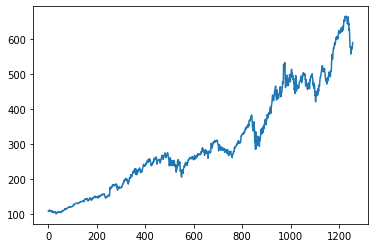

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [12]:
df1

array([[0.01407209],
       [0.01571207],
       [0.01565917],
       ...,
       [0.835085  ],
       [0.84852225],
       [0.86691472]])

In [13]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
training_size, test_size

(817, 440)

In [14]:
print(df1[0:training_size,:].shape)
print(df1[training_size:len(df1),:1].shape)

(817, 1)
(440, 1)


In [15]:

##splitting dataset into train and test split
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
len(train_data)

817

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)


(716, 100)
(716,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)


(339, 100)
(339,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:

### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Fit the model 
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 308ms/step - loss: 0.0129 - val_loss: 0.1007
Epoch 2/100
12/12 [==============================] - 2s 195ms/step - loss: 0.0028 - val_loss: 0.0227
Epoch 3/100
12/12 [==============================] - 2s 193ms/step - loss: 0.0011 - val_loss: 0.0072
Epoch 4/100
12/12 [==============================] - 2s 194ms/step - loss: 5.5242e-04 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 2s 196ms/step - loss: 3.7504e-04 - val_loss: 0.0042
Epoch 6/100
12/12 [==============================] - 2s 194ms/step - loss: 2.9279e-04 - val_loss: 0.0044
Epoch 7/100
12/12 [==============================] - 2s 191ms/step - loss: 2.8391e-04 - val_loss: 0.0053
Epoch 8/100
12/12 [==============================] - 2s 193ms/step - loss: 2.9176e-04 - val_loss: 0.0050
Epoch 9/100
12/12 [==============================] - 2s 194ms/step - loss: 2.9204e-04 - val_loss: 0.0047
Epoch 10/100
12/12 [==============================] - 2s 193ms/step

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

237.64447502759378

In [30]:
math.sqrt(mean_squared_error(ytest,test_predict))


528.6552025046328

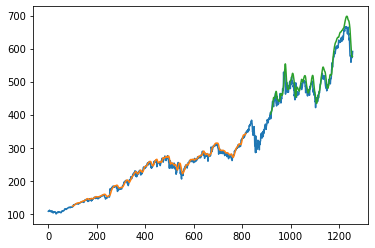

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()